In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import LancasterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score 

In [2]:
train_path = "kaggle/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
train_data_subset = train_data.sample(frac=0.2, random_state=42)

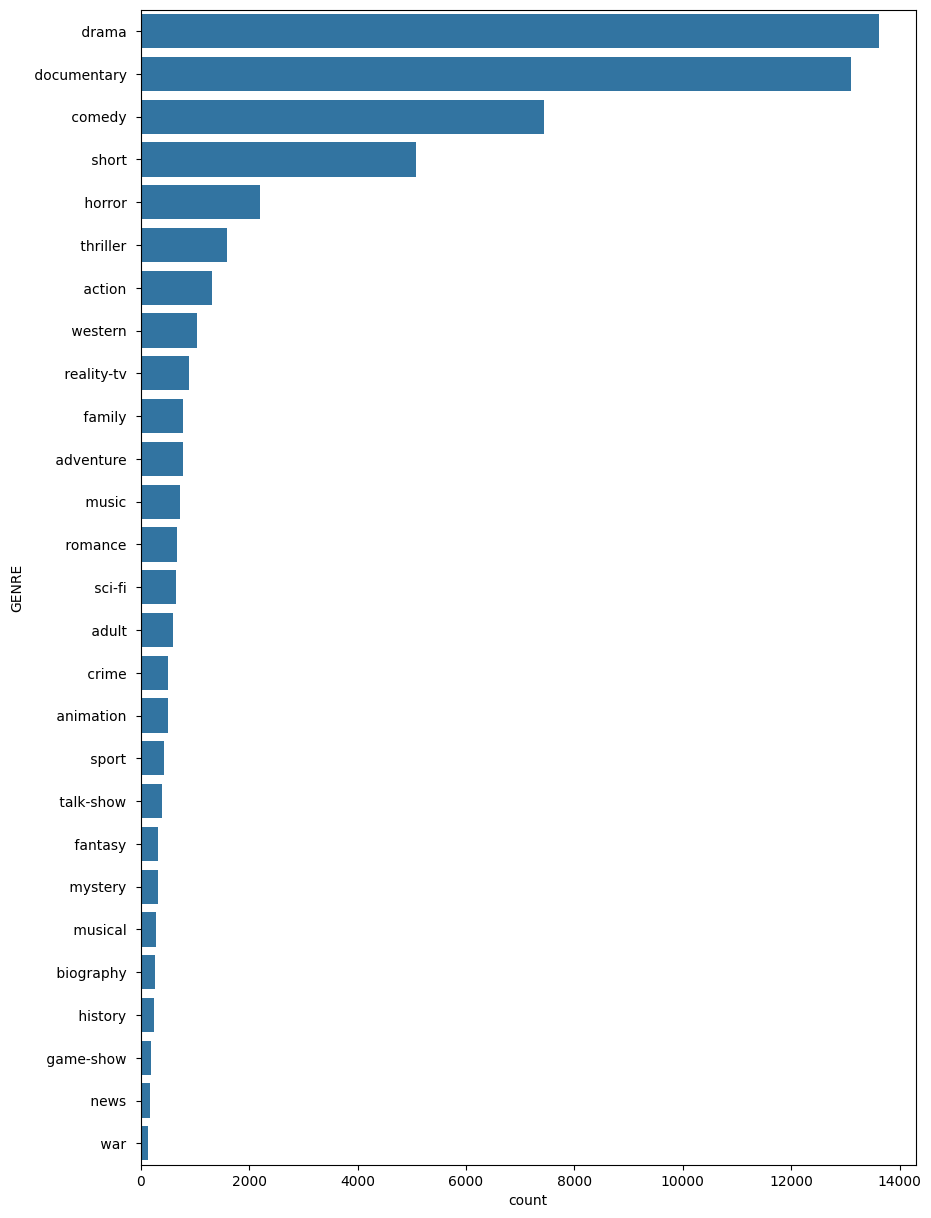

In [3]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

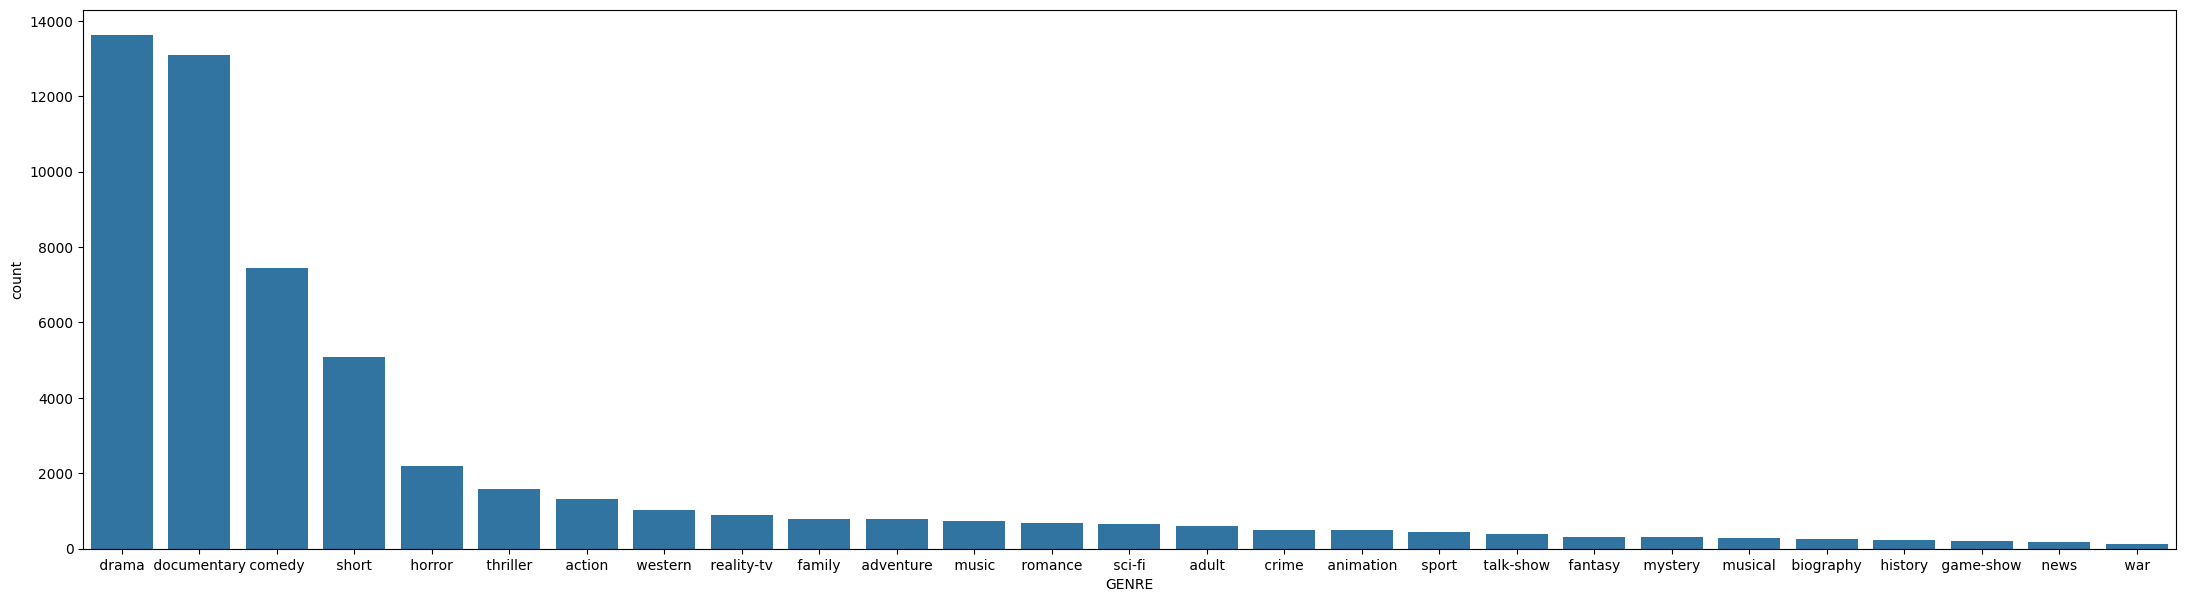

In [4]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

In [5]:
# Clean the data as before
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

In [6]:
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [7]:

train_data_subset["TextCleaning"] = train_data_subset["DESCRIPTION"].apply(cleaning_data)

In [8]:
# Vectorize the text
vectorize = TfidfVectorizer()
X_train_subset = vectorize.fit_transform(train_data_subset["TextCleaning"])
y_train_subset = train_data_subset["GENRE"]

In [9]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [10]:
# Perform a grid search for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']})

In [11]:
# Access the best hyperparameters
best_model = grid_search.best_estimator_

In [12]:
# Train the model using the best hyperparameters
best_model.fit(X_train, Y_train)

SVC(C=10, kernel='linear')

In [13]:
# Evaluate the model
train_accuracy = best_model.score(X_train, Y_train)
test_accuracy = best_model.score(X_test, Y_test)

In [14]:
print("Training Accuracy:", round(train_accuracy*100,2),"%")
print("Test Accuracy:", round(test_accuracy*100,2),"%")

Training Accuracy: 99.98 %
Test Accuracy: 53.43 %
